<a href="https://colab.research.google.com/github/tonu1990/AI_ML_Learning/blob/main/2_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CNN Intution**

* Similar to how a child learns to recognise objects, we need to show an algorithm millions of pictures before it is be able to generalize the input and make predictions for images it has never seen before.

* Computers ‘see’ in a different way than we do. Their world consists of only numbers. Every image can be represented as 2-dimensional arrays of numbers, known as pixels.

**Understanding an Image in computer scenario **

* A digital image consists of three dimensions — commonly referred to as channels in CNNs — representing the Red, Green, and Blue (RGB) color components. These three channels combine to produce the colors we perceive in an image.
* For example, consider an 8×8 color image. Computers store it as three matrices of pixel values, one for each color channel. Thus, its representation becomes 8×8×3 (height × width × channels).

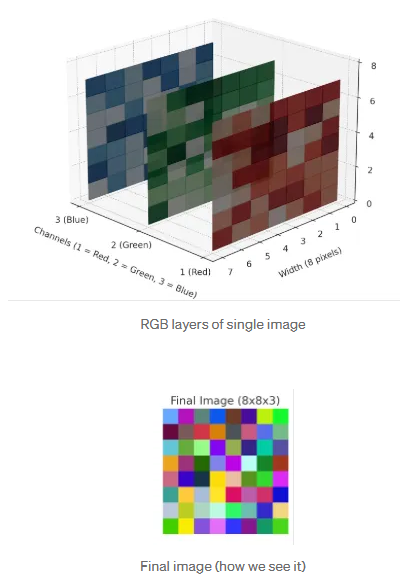